In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls

In [4]:
#Testing the API with London to see what the response data looks like
response = requests.get(f"{url}London&&units=imperial&APPID={api_key}")
print(response.url)
data = response.json()
pprint(data)

http://api.openweathermap.org/data/2.5/weather?q=London&&units=imperial&APPID=482f0bce7aa613e189f5dd3c3852eeca
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1588120492,
 'id': 2643743,
 'main': {'feels_like': 42.42,
          'humidity': 93,
          'pressure': 1004,
          'temp': 45.73,
          'temp_max': 46.99,
          'temp_min': 45},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1588134919,
         'sunset': 1588188006,
         'type': 1},
 'timezone': 3600,
 'visibility': 8000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'speed': 3.36}}


In [5]:
#lists for city name, lat, lon, temp, humidity, windspeed, cloudiness, skipped cities
cityList = []
latList = []
lonList = []
tempList = []
humList = []
wsList = []
cldList = []
skips = []

#date when the data was collected
d = str(datetime.datetime.today())
d = d[:10]

i = 0
while len(latList) < 500:
    
    city = cities[i]
    
    response = requests.get(f"{url}{city}&units=imperial&APPID={api_key}")
    data = response.json()
    
    #was getting a 404 error for some cities so we skip them to build our list of 500
    if data['cod'] != '404':
        
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        temp = data['main']['temp']
        hum = data['main']['humidity']
        ws = data['wind']['speed']
        cld = data['clouds']['all']
        
        #print data for each city
        print(f"{i+1}: {city} ({lat}, {lon})  Temp: {temp}  Cloudiness: {cld}  Humidity: {hum} Wind Speed: {ws}")
        
        #add data for each city to end of each list
        cityList.append(city)
        latList.append(lat)
        lonList.append(lon)
        tempList.append(temp)
        humList.append(hum)
        wsList.append(ws)
        cldList.append(cld)
        
    else:
        print(f"No data for {city} trying next city...")
        skips.append(city)
        
    i = i + 1
    
print(f"{len(skips)} cities skipped.")     
    

1: hasaki (35.73, 140.83)  Temp: 63.63  Cloudiness: 20  Humidity: 55 Wind Speed: 2.24
2: teluk nibung (3, 99.82)  Temp: 75.74  Cloudiness: 100  Humidity: 92 Wind Speed: 3.78
No data for nizhneyansk trying next city...
4: mataura (-46.19, 168.86)  Temp: 61  Cloudiness: 63  Humidity: 67 Wind Speed: 5.99
No data for attawapiskat trying next city...
6: pevek (69.7, 170.31)  Temp: 26.89  Cloudiness: 100  Humidity: 95 Wind Speed: 3.24
7: albany (42.6, -73.97)  Temp: 51.66  Cloudiness: 22  Humidity: 57 Wind Speed: 2.95
8: laiyang (36.98, 120.71)  Temp: 67.98  Cloudiness: 0  Humidity: 37 Wind Speed: 14.41
9: bambous virieux (-20.34, 57.76)  Temp: 69.89  Cloudiness: 75  Humidity: 94 Wind Speed: 8.05
10: iquique (-20.22, -70.14)  Temp: 66.2  Cloudiness: 90  Humidity: 72 Wind Speed: 8.05
11: puerto ayora (-0.74, -90.35)  Temp: 79.65  Cloudiness: 20  Humidity: 69 Wind Speed: 16.11
12: chuy (-33.7, -53.46)  Temp: 67.42  Cloudiness: 100  Humidity: 94 Wind Speed: 10.89
13: ponta do sol (32.67, -17.1)

98: marsa matruh (31.35, 27.25)  Temp: 61.84  Cloudiness: 35  Humidity: 82 Wind Speed: 7.05
99: lazaro cardenas (17.96, -102.2)  Temp: 80.35  Cloudiness: 0  Humidity: 63 Wind Speed: 6.17
100: qaanaaq (77.48, -69.36)  Temp: 0.63  Cloudiness: 100  Humidity: 82 Wind Speed: 5.03
No data for manwath trying next city...
102: uruzgan (32.83, 66)  Temp: 59.92  Cloudiness: 98  Humidity: 24 Wind Speed: 2.35
103: kodiak (57.79, -152.41)  Temp: 51.8  Cloudiness: 20  Humidity: 50 Wind Speed: 14.99
No data for grand river south east trying next city...
105: rikitea (-23.12, -134.97)  Temp: 78.24  Cloudiness: 55  Humidity: 82 Wind Speed: 15.5
106: kahului (20.89, -156.47)  Temp: 77.04  Cloudiness: 40  Humidity: 51 Wind Speed: 24.16
107: butaritari (3.07, 172.79)  Temp: 83.08  Cloudiness: 100  Humidity: 77 Wind Speed: 14.25
108: lebu (-37.62, -73.65)  Temp: 52.75  Cloudiness: 0  Humidity: 84 Wind Speed: 3.33
No data for yeltsovka trying next city...
110: banjarmasin (-3.32, 114.59)  Temp: 77  Cloudine

194: zhangjiakou (40.81, 114.88)  Temp: 71.73  Cloudiness: 28  Humidity: 14 Wind Speed: 3.42
195: goulburn (-34.75, 149.72)  Temp: 62.64  Cloudiness: 91  Humidity: 73 Wind Speed: 19.33
196: cooma (-36.23, 149.13)  Temp: 60.8  Cloudiness: 100  Humidity: 77 Wind Speed: 21.92
197: natal (-5.79, -35.21)  Temp: 77  Cloudiness: 20  Humidity: 94 Wind Speed: 5.82
No data for illoqqortoormiut trying next city...
199: bakel (14.9, -12.46)  Temp: 96.15  Cloudiness: 55  Humidity: 14 Wind Speed: 12.15
200: kirovskiy (45.09, 133.51)  Temp: 59.02  Cloudiness: 13  Humidity: 38 Wind Speed: 11.79
201: whitehorse (60.72, -135.05)  Temp: 48.09  Cloudiness: 75  Humidity: 36 Wind Speed: 10.29
202: jackson (42.42, -122.83)  Temp: 80.64  Cloudiness: 1  Humidity: 26 Wind Speed: 6.93
203: nome (64.5, -165.41)  Temp: 26.42  Cloudiness: 90  Humidity: 79 Wind Speed: 12.75
204: den helder (52.96, 4.76)  Temp: 46.15  Cloudiness: 90  Humidity: 87 Wind Speed: 12.75
205: karratha (-20.74, 116.85)  Temp: 90.07  Cloudine

291: shihezi (44.3, 86.03)  Temp: 78.66  Cloudiness: 0  Humidity: 18 Wind Speed: 2.28
292: peniche (39.36, -9.38)  Temp: 56.07  Cloudiness: 9  Humidity: 87 Wind Speed: 5.99
293: narsaq (60.92, -46.05)  Temp: 39.2  Cloudiness: 26  Humidity: 44 Wind Speed: 4.7
No data for port-de-paix trying next city...
295: talcahuano (-36.72, -73.12)  Temp: 53.6  Cloudiness: 0  Humidity: 93 Wind Speed: 6.93
296: arkhangelsk (64.54, 40.54)  Temp: 30.2  Cloudiness: 40  Humidity: 80 Wind Speed: 4.47
297: bengkulu (-3.8, 102.27)  Temp: 80.51  Cloudiness: 1  Humidity: 74 Wind Speed: 2.62
298: cascais (38.7, -9.42)  Temp: 58.35  Cloudiness: 36  Humidity: 85 Wind Speed: 8.1
299: portland (45.52, -122.68)  Temp: 70.88  Cloudiness: 75  Humidity: 40 Wind Speed: 3.36
300: deputatskiy (69.3, 139.9)  Temp: 18.61  Cloudiness: 100  Humidity: 91 Wind Speed: 4.47
301: saskylakh (71.92, 114.08)  Temp: 17.89  Cloudiness: 95  Humidity: 96 Wind Speed: 4.29
302: nalut (30.33, 10.85)  Temp: 75.27  Cloudiness: 0  Humidity: 1

388: xuddur (4.12, 43.89)  Temp: 76.05  Cloudiness: 99  Humidity: 71 Wind Speed: 9.01
389: puerto madryn (-42.77, -65.04)  Temp: 57.83  Cloudiness: 0  Humidity: 73 Wind Speed: 8.63
390: amapa (1, -52)  Temp: 73.38  Cloudiness: 100  Humidity: 94 Wind Speed: 3.11
391: wad rawah (15.16, 33.14)  Temp: 81.73  Cloudiness: 23  Humidity: 13 Wind Speed: 7.45
392: dondo (-19.61, 34.74)  Temp: 65.79  Cloudiness: 0  Humidity: 92 Wind Speed: 4.29
393: pierre (44.37, -100.35)  Temp: 60.37  Cloudiness: 75  Humidity: 44 Wind Speed: 26.4
394: tual (-5.67, 132.75)  Temp: 82.63  Cloudiness: 100  Humidity: 77 Wind Speed: 6.87
395: marzuq (14.4, 46.47)  Temp: 75.9  Cloudiness: 69  Humidity: 43 Wind Speed: 5.3
396: mokhsogollokh (61.47, 128.92)  Temp: 35.91  Cloudiness: 100  Humidity: 92 Wind Speed: 3.22
397: sept-iles (50.2, -66.38)  Temp: 35.6  Cloudiness: 75  Humidity: 64 Wind Speed: 3.36
398: arica (-18.48, -70.3)  Temp: 66.2  Cloudiness: 40  Humidity: 77 Wind Speed: 0.2
399: waipawa (-41.41, 175.52)  T

487: san andres (12.58, -81.7)  Temp: 84.2  Cloudiness: 40  Humidity: 70 Wind Speed: 13.87
488: lovington (32.94, -103.35)  Temp: 90.55  Cloudiness: 1  Humidity: 7 Wind Speed: 13.87
489: the valley (18.22, -63.06)  Temp: 80.2  Cloudiness: 20  Humidity: 74 Wind Speed: 9.17
490: svetlaya (46.54, 138.33)  Temp: 49.1  Cloudiness: 40  Humidity: 57 Wind Speed: 3.24
491: barcelos (41.54, -8.62)  Temp: 56.28  Cloudiness: 75  Humidity: 87 Wind Speed: 14.99
492: mapimi (25.82, -103.85)  Temp: 95.31  Cloudiness: 40  Humidity: 9 Wind Speed: 10.29
493: gorontalo (0.54, 123.06)  Temp: 83.28  Cloudiness: 40  Humidity: 78 Wind Speed: 0.47
494: nanchang (28.68, 115.88)  Temp: 76.08  Cloudiness: 0  Humidity: 57 Wind Speed: 4.74
495: pangnirtung (66.15, -65.71)  Temp: 10.45  Cloudiness: 0  Humidity: 77 Wind Speed: 2.84
No data for lushunkou trying next city...
No data for samalaeulu trying next city...
498: fairbanks (64.84, -147.72)  Temp: 45.19  Cloudiness: 20  Humidity: 28 Wind Speed: 10.29
499: storn

In [7]:
#create a dataframe from our lists
data_df = pd.DataFrame({
    'City': cityList,
    'Lat': latList,
    'Lon': lonList,
    'Temp(F)': tempList,
    'Humidity%': humList,
    'Wind Speed': wsList,
    'Cloudiness%': cldList
    
})
#export to CSV file
data_df.to_csv("cityWeather.csv", index=False, header=True)
data_df.head()

,City,Lat,Lon,Temp(F),Humidity%,Wind Speed,Cloudiness%
0,hasaki,35.73,140.83,63.63,55,2.24,20
1,teluk nibung,3.00,99.82,75.74,92,3.78,100
2,mataura,-46.19,168.86,61.00,67,5.99,63
3,pevek,69.70,170.31,26.89,95,3.24,100
4,albany,42.60,-73.97,51.66,57,2.95,22


### Plotting the Data

#### Latitude vs. Temperature Plot

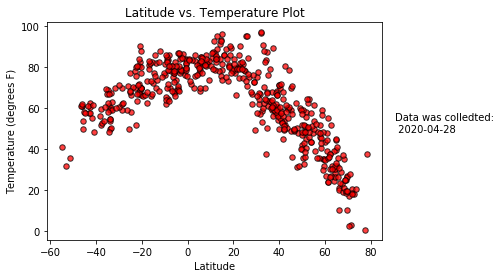

In [8]:
x_axis = data_df['Lat']
temp = data_df['Temp(F)']
plt.scatter(x_axis, temp, marker="o", facecolors="red", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (degrees F)")
plt.savefig('tempPlot.png')
side_text = plt.figtext(0.93, 0.5, f'Data was colledted: \n {d}')